In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import math


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
dataset = pd.read_csv('tesla.csv')
dataset.describe()


,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [6]:
x = dataset[['High', 'Low', 'Open', 'Volume']].values
y = dataset[['Close']].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
regression = LinearRegression()

In [10]:
regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(regression.coef_)

[[ 8.54232795e-01  7.16090185e-01 -5.71183458e-01 -3.82356172e-08]]


In [12]:
print(regression.intercept_)

[0.02967901]


In [16]:
prediction = regression.predict(x_test)
dframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':prediction.flatten()})

dframe.head(25)

,Actual,Predicted
0,30.090000,31.286019
1,258.000000,255.833139
2,204.990005,202.604123
3,17.459999,16.631611
4,263.820007,265.432417
5,34.099998,34.036534
6,28.980000,28.006774
7,35.000000,34.870565
8,28.490000,28.216008
9,246.720001,243.620346


In [18]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 1.0985812103639014
Mean Squared Error: 2.646852288729205
Root Mean Squared Error: 1.62691496050937


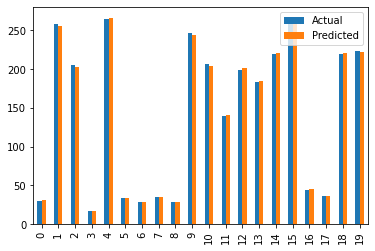

In [24]:
graph = dframe.head(20)
graph.plot(kind='bar')